In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import swifter
import numpy as np

In [93]:
df = pd.read_csv('data.csv')

In [94]:
df

,time,host,content,flavor,feed,ent,entname,entno,trades,quotes,backgrounds
0,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent1,124,124,322,179,68
1,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent2,346,346,271,795,331
2,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent9,986,986,586,669,898
3,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent3,467,467,619,650,704
4,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent4,789,789,280,659,14
...,...,...,...,...,...,...,...,...,...,...,...
120955,2022-01-03 13:23:20,host2,content1,flavor1,feed3,ent6,234,234,384,581,513
120956,2022-01-03 13:23:20,host2,content1,flavor1,feed3,ent11,111,111,598,207,341
120957,2022-01-03 13:23:20,host2,content1,flavor1,feed4,ent7,890,890,602,869,284
120958,2022-01-03 13:23:20,host2,content1,flavor1,feed4,ent8,232,232,523,495,335


In [95]:
import datetime

date_time_str = '2021-12-27 13:24:20'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

In [96]:
dftime = df.loc[df['time'] == "2021-12-27 13:24:20"]

In [97]:
dftime

,time,host,content,flavor,feed,ent,entname,entno,trades,quotes,backgrounds
0,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent1,124,124,322,179,68
1,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent2,346,346,271,795,331
2,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent9,986,986,586,669,898
3,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent3,467,467,619,650,704
4,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent4,789,789,280,659,14
5,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent10,565,565,1,123,565
6,2021-12-27 13:24:20,host2,content1,flavor1,feed3,ent5,412,412,591,32,707
7,2021-12-27 13:24:20,host2,content1,flavor1,feed3,ent6,234,234,726,591,343
8,2021-12-27 13:24:20,host2,content1,flavor1,feed3,ent11,111,111,634,264,739
9,2021-12-27 13:24:20,host2,content1,flavor1,feed4,ent7,890,890,650,329,821


In [98]:
from itertools import product

df_host = df['host'].unique()
df_content = df['content'].unique()
df_flavor = df['flavor'].unique()
df_feed = df['feed'].unique()
df_ent = df['ent'].unique()

list_keys = list(product(df_host, df_content, df_flavor, df_feed, df_ent))

In [99]:
def categorise(host, content, flavor, feed, ent):
    df = pd.read_csv('data.csv')
    from itertools import product

    df_host = df['host'].unique()
    df_content = df['content'].unique()
    df_flavor = df['flavor'].unique()
    df_feed = df['feed'].unique()
    df_ent = df['ent'].unique()

    list_keys = list(product(df_host, df_content, df_flavor, df_feed, df_ent))
    
    print('done')
    for i in range(len(list_keys)):
        if list_keys[i][0] == host and list_keys[i][1] == content and list_keys[i][2] == flavor and list_keys[i][3] == feed and list_keys[i][4] == ent:
            print(i)
            return 'key'+str(i)

In [100]:
list_keys[15]

('host1', 'content1', 'flavor1', 'feed2', 'ent3')

In [101]:
dftime['keys'] = np.vectorize(categorise)(dftime['host'], dftime['content'], dftime['flavor'], dftime['feed'],dftime['ent'])

done
0
done
0
done
1
done
2
done
15
done
16
done
17
done
78
done
79
done
80
done
93
done
94
done
95


<ipython-input-101-709c95d9d7cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftime['keys'] = np.vectorize(categorise)(dftime['host'], dftime['content'], dftime['flavor'], dftime['feed'],dftime['ent'])


In [102]:
dftime['keys'].to_list()

['key0',
 'key1',
 'key2',
 'key15',
 'key16',
 'key17',
 'key78',
 'key79',
 'key80',
 'key93',
 'key94',
 'key95']

In [103]:
int(df.shape[0]/dftime.shape[0])

10080

In [104]:
df['keys'] = dftime['keys'].to_list()*int(df.shape[0]/dftime.shape[0])

In [105]:
df

,time,host,content,flavor,feed,ent,entname,entno,trades,quotes,backgrounds,keys
0,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent1,124,124,322,179,68,key0
1,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent2,346,346,271,795,331,key1
2,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent9,986,986,586,669,898,key2
3,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent3,467,467,619,650,704,key15
4,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent4,789,789,280,659,14,key16
...,...,...,...,...,...,...,...,...,...,...,...,...
120955,2022-01-03 13:23:20,host2,content1,flavor1,feed3,ent6,234,234,384,581,513,key79
120956,2022-01-03 13:23:20,host2,content1,flavor1,feed3,ent11,111,111,598,207,341,key80
120957,2022-01-03 13:23:20,host2,content1,flavor1,feed4,ent7,890,890,602,869,284,key93
120958,2022-01-03 13:23:20,host2,content1,flavor1,feed4,ent8,232,232,523,495,335,key94


In [106]:
df1 = df.loc[df['keys'] == 'key0']
df1

,time,host,content,flavor,feed,ent,entname,entno,trades,quotes,backgrounds,keys
0,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent1,124,124,322,179,68,key0
12,2021-12-27 13:25:20,host1,content1,flavor1,feed1,ent1,124,124,288,509,670,key0
24,2021-12-27 13:26:20,host1,content1,flavor1,feed1,ent1,124,124,747,703,47,key0
36,2021-12-27 13:27:20,host1,content1,flavor1,feed1,ent1,124,124,7000,472,7000,key0
48,2021-12-27 13:28:20,host1,content1,flavor1,feed1,ent1,124,124,946,259,815,key0
...,...,...,...,...,...,...,...,...,...,...,...,...
120900,2022-01-03 13:19:20,host1,content1,flavor1,feed1,ent1,124,124,58,915,271,key0
120912,2022-01-03 13:20:20,host1,content1,flavor1,feed1,ent1,124,124,523,289,810,key0
120924,2022-01-03 13:21:20,host1,content1,flavor1,feed1,ent1,124,124,937,908,627,key0
120936,2022-01-03 13:22:20,host1,content1,flavor1,feed1,ent1,124,124,913,741,208,key0


<AxesSubplot:>

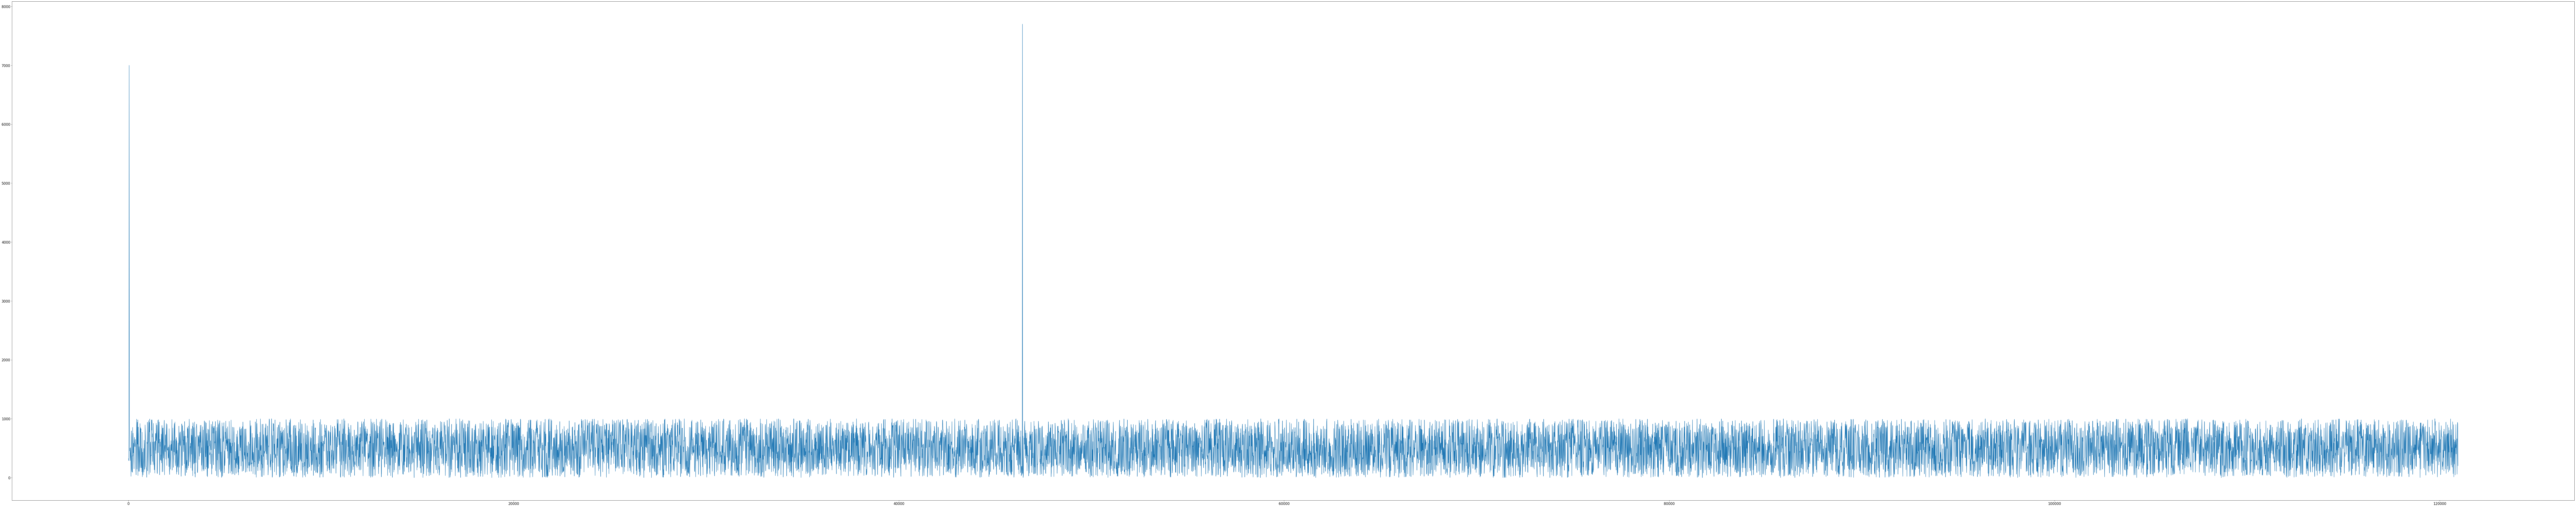

In [107]:
plt.rc('figure',figsize=(200,40))
plt.rc('font',size=15)
df1['trades'].plot()

In [108]:
df['keys'].unique()

array(['key0', 'key1', 'key2', 'key15', 'key16', 'key17', 'key78',
       'key79', 'key80', 'key93', 'key94', 'key95'], dtype=object)

In [109]:
model_dict_trades = dict()
for key in df['keys'].unique():
    dfkey = df.loc[df['keys'] == key]
    outliers_fraction = float(.01)
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(dfkey['trades'].values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    # train isolation forest
    model =  IsolationForest(n_estimators=100,max_samples='auto',contamination=outliers_fraction)
    model.fit(data)
    model_dict_trades[key] = model

In [110]:
model_dict_trades

{'key0': IsolationForest(contamination=0.01),
 'key1': IsolationForest(contamination=0.01),
 'key2': IsolationForest(contamination=0.01),
 'key15': IsolationForest(contamination=0.01),
 'key16': IsolationForest(contamination=0.01),
 'key17': IsolationForest(contamination=0.01),
 'key78': IsolationForest(contamination=0.01),
 'key79': IsolationForest(contamination=0.01),
 'key80': IsolationForest(contamination=0.01),
 'key93': IsolationForest(contamination=0.01),
 'key94': IsolationForest(contamination=0.01),
 'key95': IsolationForest(contamination=0.01)}

In [111]:
model_dict_quotes = dict()
for key in df['keys'].unique():
    dfkey = df.loc[df['keys'] == key]
    outliers_fraction = float(.01)
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(dfkey['quotes'].values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    # train isolation forest
    model =  IsolationForest(n_estimators=100,max_samples='auto',contamination=outliers_fraction)
    model.fit(data)
    model_dict_quotes[key] = model

In [112]:
model_dict_quotes

{'key0': IsolationForest(contamination=0.01),
 'key1': IsolationForest(contamination=0.01),
 'key2': IsolationForest(contamination=0.01),
 'key15': IsolationForest(contamination=0.01),
 'key16': IsolationForest(contamination=0.01),
 'key17': IsolationForest(contamination=0.01),
 'key78': IsolationForest(contamination=0.01),
 'key79': IsolationForest(contamination=0.01),
 'key80': IsolationForest(contamination=0.01),
 'key93': IsolationForest(contamination=0.01),
 'key94': IsolationForest(contamination=0.01),
 'key95': IsolationForest(contamination=0.01)}

In [113]:
model_dict_backgrounds = dict()
for key in df['keys'].unique():
    dfkey = df.loc[df['keys'] == key]
    outliers_fraction = float(.01)
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(dfkey['backgrounds'].values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    # train isolation forest
    model =  IsolationForest(n_estimators=100,max_samples='auto',contamination=outliers_fraction)
    model.fit(data)
    model_dict_backgrounds[key] = model

In [114]:
model_dict_backgrounds

{'key0': IsolationForest(contamination=0.01),
 'key1': IsolationForest(contamination=0.01),
 'key2': IsolationForest(contamination=0.01),
 'key15': IsolationForest(contamination=0.01),
 'key16': IsolationForest(contamination=0.01),
 'key17': IsolationForest(contamination=0.01),
 'key78': IsolationForest(contamination=0.01),
 'key79': IsolationForest(contamination=0.01),
 'key80': IsolationForest(contamination=0.01),
 'key93': IsolationForest(contamination=0.01),
 'key94': IsolationForest(contamination=0.01),
 'key95': IsolationForest(contamination=0.01)}

In [115]:
import pickle

modlist = [model_dict_trades,model_dict_quotes,model_dict_backgrounds]

filename = "models.sav"

s = pickle.dump(modlist, open(filename, 'wb'))

modlist_loaded = pickle.load(open(filename, 'rb'))

In [116]:
modlist_loaded = pickle.load(open(filename, 'rb'))

modlist_loaded[0]['key0']

IsolationForest(contamination=0.01)

In [117]:
data = pd.DataFrame(scaler.fit_transform(df1['trades'].values.reshape(-1, 1)))

In [118]:
df1 = df.loc[df['keys'] == 'key0']

In [119]:
df1

,time,host,content,flavor,feed,ent,entname,entno,trades,quotes,backgrounds,keys
0,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent1,124,124,322,179,68,key0
12,2021-12-27 13:25:20,host1,content1,flavor1,feed1,ent1,124,124,288,509,670,key0
24,2021-12-27 13:26:20,host1,content1,flavor1,feed1,ent1,124,124,747,703,47,key0
36,2021-12-27 13:27:20,host1,content1,flavor1,feed1,ent1,124,124,7000,472,7000,key0
48,2021-12-27 13:28:20,host1,content1,flavor1,feed1,ent1,124,124,946,259,815,key0
...,...,...,...,...,...,...,...,...,...,...,...,...
120900,2022-01-03 13:19:20,host1,content1,flavor1,feed1,ent1,124,124,58,915,271,key0
120912,2022-01-03 13:20:20,host1,content1,flavor1,feed1,ent1,124,124,523,289,810,key0
120924,2022-01-03 13:21:20,host1,content1,flavor1,feed1,ent1,124,124,937,908,627,key0
120936,2022-01-03 13:22:20,host1,content1,flavor1,feed1,ent1,124,124,913,741,208,key0


<ipython-input-120-cd71a9944782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['anomaly'] = modlist_loaded[0]['key0'].predict(data)


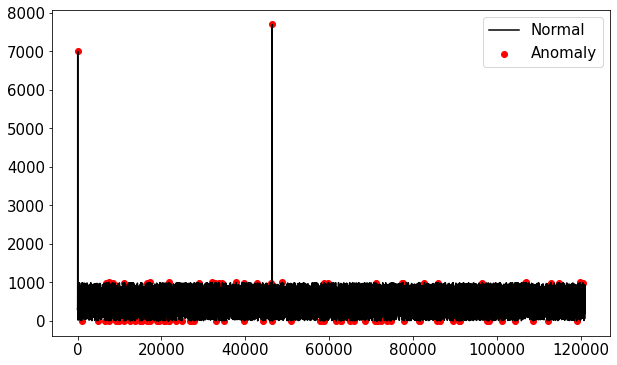

In [120]:
df1['anomaly'] = modlist_loaded[0]['key0'].predict(data)
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = df1.loc[df1['anomaly'] == -1, ['trades']] #anomaly
plt.plot(df1.index, df1['trades'], color='black', label = 'Normal')
plt.scatter(a.index,a['trades'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

In [121]:
df1.loc[df1['anomaly'] == -1]

,time,host,content,flavor,feed,ent,entname,entno,trades,quotes,backgrounds,keys,anomaly
36,2021-12-27 13:27:20,host1,content1,flavor1,feed1,ent1,124,124,7000,472,7000,key0,-1
948,2021-12-27 14:43:20,host1,content1,flavor1,feed1,ent1,124,124,6,909,234,key0,-1
4836,2021-12-27 20:07:20,host1,content1,flavor1,feed1,ent1,124,124,5,206,621,key0,-1
6636,2021-12-27 22:37:20,host1,content1,flavor1,feed1,ent1,124,124,6,197,859,key0,-1
6852,2021-12-27 22:55:20,host1,content1,flavor1,feed1,ent1,124,124,998,211,929,key0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112824,2022-01-03 02:06:20,host1,content1,flavor1,feed1,ent1,124,124,999,98,995,key0,-1
114792,2022-01-03 04:50:20,host1,content1,flavor1,feed1,ent1,124,124,997,615,755,key0,-1
118980,2022-01-03 10:39:20,host1,content1,flavor1,feed1,ent1,124,124,1,177,256,key0,-1
119748,2022-01-03 11:43:20,host1,content1,flavor1,feed1,ent1,124,124,1000,150,106,key0,-1


In [126]:
df1_anomalies = df1.loc[df1['anomaly'] == -1]

In [127]:
df1_anomalies['trades'].unique()

array([7000,    6,    5,  998,  997, 1000,  999,    4,    0,    2,    3,
          1, 7700])